In [1]:
# Render our plots inline
%matplotlib inline

# Import modules for reading and plotting data
import pandas as pd
import matplotlib.pyplot as plt

# Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some earthquake data from the Southern California Earthquake Data Center (see [this page](http://service.scedc.caltech.edu/eq-catalogs/date_mag_loc.php) for more details or to retrieve your own earthquake catalog). 

This dataset is a list of earthquakes occurring in Southern California with magnitude 4 or higher from 2002 to 2017.

In [2]:
broken_df = pd.read_csv('data/scedc.csv')

In [3]:
# Look at the first 3 rows
broken_df[:3]

,#YYY/MM/DD HH:mm:SS.ss ET GT MAG M LAT LON DEPTH Q EVID NPH NGRM
0,2002/01/02 12:11:28.68 eq l 4.21 l 33.37933...
1,2002/01/19 23:44:29.21 eq l 4.19 l 31.04883...
2,2002/01/29 05:53:28.93 eq l 4.18 l 34.36133...


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* Change the column separator (in this case, it's whitespace)
* Change the first 2 column names to 'Date' and 'Time'
* Set the index to be the 'Date' column

In [4]:
# set the column separator (delimiter)
fixed_df = pd.read_csv('data/scedc.csv'
                       , delim_whitespace=True  # could use sep=' ' instead for delimiter
                       , header=0)              # says the column information is in line 0

# change the first 2 columns (index 0 and 1) name to Date and Time by 
# adding list of ['Date','Time'] to list of columns in position 2 and on
fixed_df.columns = ['Date','Time'] + fixed_df.columns.tolist()[2:]

# set the index to be the Date
fixed_df.index = pd.to_datetime(fixed_df['Date'])  
fixed_df[:3]

,Date,Time,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
Date,,,,,,,,,,,,,
2002-01-02,2002/01/02,12:11:28.68,eq,l,4.21,l,33.37933,-116.43450,11.2,A,9742277,80,1587
2002-01-19,2002/01/19,23:44:29.21,eq,l,4.19,l,31.04883,-115.38733,6.6,D,9750141,17,625
2002-01-29,2002/01/29,05:53:28.93,eq,l,4.18,l,34.36133,-118.65717,13.7,A,9753485,129,1596


# Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [5]:
fixed_df['MAG']

Date
2002-01-02    4.21
2002-01-19    4.19
2002-01-29    4.18
2002-02-22    5.70
2002-02-22    4.13
2002-03-16    4.60
2002-04-05    4.39
2002-04-29    4.10
2002-06-14    4.58
2002-09-03    4.78
2002-09-04    4.15
2002-09-21    4.31
2002-09-28    4.13
2002-10-29    4.77
2002-11-12    4.22
2002-11-26    4.08
2002-12-10    4.84
2002-12-12    4.21
2003-01-25    4.54
2003-02-07    4.99
2003-02-22    4.99
2003-02-22    4.00
2003-02-22    4.34
2003-02-22    4.01
2003-02-22    4.10
2003-02-22    4.50
2003-02-25    4.61
2003-02-27    4.04
2003-03-11    4.64
2003-05-24    4.17
              ... 
2014-03-17    4.40
2014-03-29    5.09
2014-03-29    4.14
2014-04-19    4.24
2014-06-02    4.16
2014-07-05    4.58
2014-09-07    4.02
2014-11-10    4.11
2014-12-24    4.19
2015-01-04    4.25
2015-02-09    4.89
2015-03-30    4.04
2015-04-08    4.27
2015-04-08    4.03
2015-05-21    4.10
2015-09-16    4.00
2015-11-13    4.28
2015-12-27    4.25
2015-12-30    4.40
2016-01-06    4.39
2016-01-24    4.11
2016-02

We can also look at some basic statistics of each column.

In [6]:
fixed_df.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000
mean,4.388063,33.098703,-116.264848,7.664165,1.491426e+07,101.314770,2023.046005
std,0.375762,1.337411,1.208391,4.295665,6.566759e+06,100.302347,421.468025
min,4.000000,30.094830,-120.956670,-2.100000,9.742277e+06,7.000000,274.000000
25%,4.110000,32.207830,-116.858000,4.800000,1.070141e+07,31.000000,1917.000000
50%,4.280000,32.660170,-115.773330,7.400000,1.434882e+07,64.000000,2022.000000
75%,4.570000,33.948500,-115.317500,10.000000,1.474617e+07,132.000000,2098.000000
max,7.200000,37.178830,-114.690500,22.100000,3.770163e+07,716.000000,3455.000000


In [7]:
fixed_df.MAG.mean() # mean magnitude

4.3880629539951572

In [8]:
fixed_df.DEPTH.max() # maximum depth

22.100000000000001

In [9]:
fixed_df.NPH.std() # standard deviation of number of phases used

100.30234729831265

#  Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see the 2010 El-Mayor Cucapah earthquake has the highest magnitude.

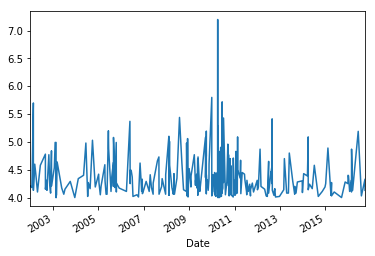

In [10]:
fixed_df['MAG'].plot()

Let's make the plot bigger.

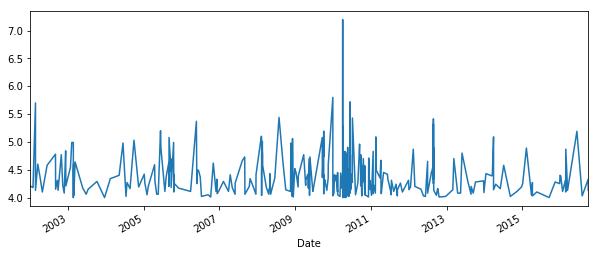

In [11]:
fixed_df['MAG'].plot(figsize=(10,4))

How about changing the linestyle and symbol opacity (alpha)?

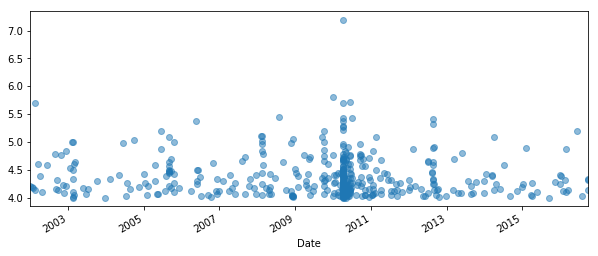

In [12]:
fixed_df['MAG'].plot(figsize=(10,4),linestyle='',marker='o', alpha=0.5)

Can we add a legend? Yes!

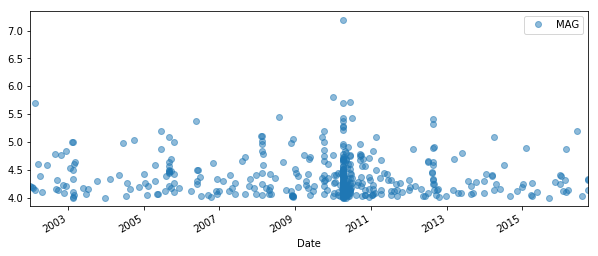

In [13]:
fixed_df['MAG'].plot(figsize=(10,4),linestyle='',marker='o', alpha=0.5,legend=True)

We can also plot a rolling mean of the data. Let's show the rolling mean of depth for windows of 15 events.

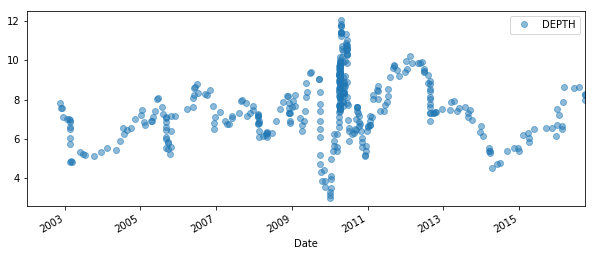

In [14]:
fixed_df['DEPTH'].rolling(window=15).mean().plot(figsize=(10,4),linestyle='',marker='o', alpha=0.5,legend=True)

What if we want to know the cumulative number of events?

In [15]:
import numpy as np
cumulative_df = fixed_df.apply(np.cumsum).copy()

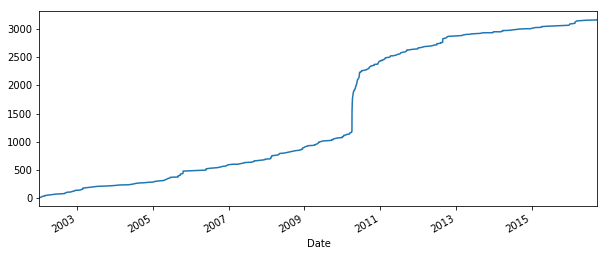

In [16]:
cumulative_df['DEPTH'].plot(figsize=(10,4))

What about number of events each day?

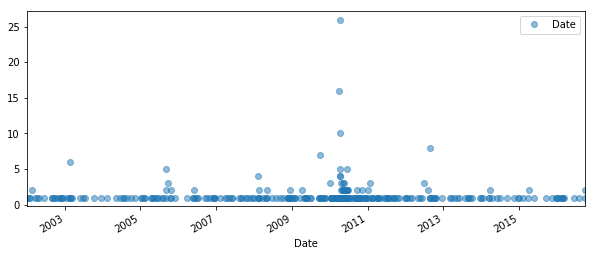

In [17]:
fixed_df['Date'].groupby([fixed_df.index]).count().plot(figsize=(10,4),linestyle='',marker='o', alpha=0.5,legend=True)


What if we wanted to know the distribution of each earthquake characteristic?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31e1376a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f31e1048ac8>]], dtype=object)

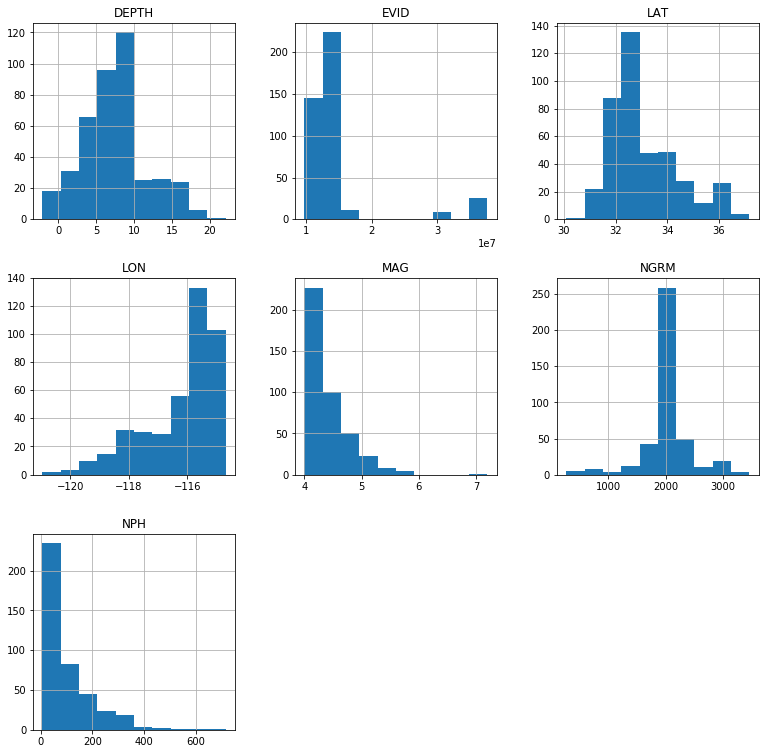

In [18]:
fixed_df.hist(figsize=(13,13))

We see here that most depths are around 8-10 km and most events have about magnitude 4.